En este análisis exploratorio de datos (EDA), se examinarán los conjuntos de datos obtenidos a través del proceso de Extracción, Transformación y Carga (ETL). El objetivo es comprender la composición y las características de estos datos, identificar patrones y tendencias, así como detectar posibles irregularidades. Este análisis proporcionará una visión general que servirá como punto de partida para investigaciones más detalladas y la toma de decisiones informadas.

Primero importamos las librerías que vamos a utilizar

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pyarrow as pa
import pyarrow.parquet as pq
import warnings
warnings.filterwarnings('ignore')

# EDA sobre el archivo games.parquet

In [2]:
games = pq.read_table("datasets/Parquet/games.parquet").to_pandas()
games.head()

,genres,app_name,price,id,developer,release_year
0,"[Strategy, Action, Indie, Casual, Simulation]",Lost Summoner Kitty,4.99,761140,Kotoshiro,2018
1,"[Free to Play, Strategy, Indie, RPG]",Ironbound,0.00,643980,Secret Level SRL,2018
2,"[Free to Play, Simulation, Sports, Casual, Indie]",Real Pool 3D - Poolians,0.00,670290,Poolians.com,2017
3,"[Action, Adventure, Casual]",弹炸人2222,0.99,767400,彼岸领域,2017
4,"[Action, Adventure, Simulation]",Battle Royale Trainer,3.99,772540,Trickjump Games Ltd,2018


Contenido del dataframe por columna para cada juego:
* **genres**: generos
* **app_name**: nombre
* **price**: precio
* **id**: identificador único
* **developer**: desarrollador
* **release_year**: año de estreno

Visualizamos las columnas y sus tipos de datos

In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29961 entries, 0 to 29960
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   genres        29961 non-null  object 
 1   app_name      29961 non-null  object 
 2   price         29961 non-null  float64
 3   id            29961 non-null  int32  
 4   developer     28755 non-null  object 
 5   release_year  29961 non-null  int32  
dtypes: float64(1), int32(2), object(3)
memory usage: 1.1+ MB


Chequeo de nulos por columna

In [4]:
games.isnull().sum()

genres             0
app_name           0
price              0
id                 0
developer       1206
release_year       0
dtype: int64

Cantidad de productos únicos

In [5]:
games_unicos = len(games['id'].unique())
print(f'La cantidad de productos únicos es de {games_unicos}')

La cantidad de productos únicos es de 29961


### Frecuencia de cada genero

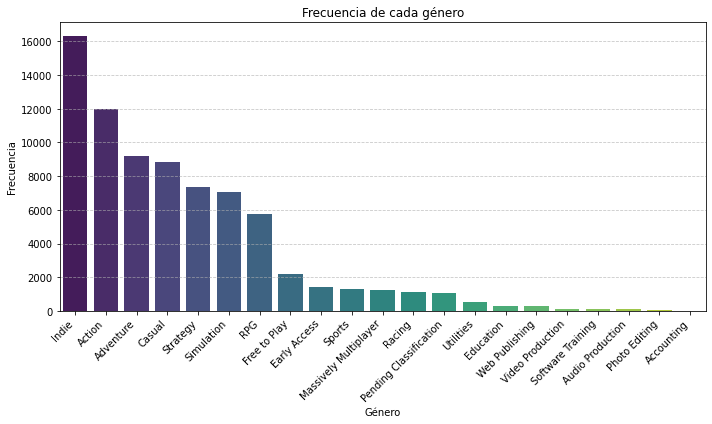

In [6]:
# Descomponer la lista de géneros y contar la frecuencia de cada uno
generos_lista = games['genres'].explode()
frecuencia_generos = generos_lista.value_counts()

# Crear el gráfico de barras utilizando Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=frecuencia_generos.index, y=frecuencia_generos.values, palette='viridis')
plt.title('Frecuencia de cada género')
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')  # Ajustar la rotación y la alineación de las etiquetas
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

**Observación:** El top 3 de categorias son Indie, Action y Adventure

### Cantidad de juegos lanzados por año

In [7]:
games["release_year"].value_counts()

release_year
2017    9594
2016    6943
2015    4952
2014    2843
2013    1552
2012    1192
2011     590
2010     442
2009     341
2008     213
2007     167
2018     157
2006     155
2005     102
2003      84
2004      79
2001      69
1998      61
1999      55
2002      50
1997      42
2000      40
1996      39
1994      36
1993      34
1995      33
1991      16
1992      15
1990      12
1989      10
1987       9
1988       7
1984       4
1983       4
2019       4
1985       3
1982       3
1981       3
1970       2
1986       1
2021       1
1975       1
1980       1
Name: count, dtype: int64

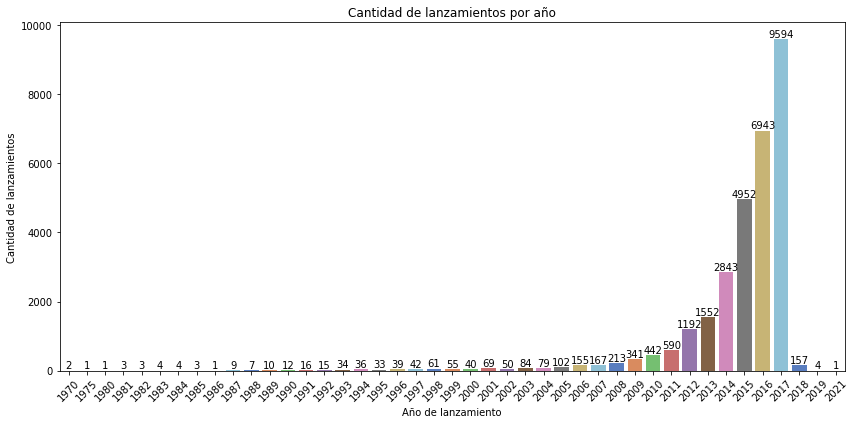

In [8]:
# Crear el gráfico de barras utilizando Seaborn
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=games, x='release_year', palette='muted')

# Agregar etiquetas de valores en cada barra
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 5), 
                textcoords = 'offset points')

plt.title('Cantidad de lanzamientos por año')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Cantidad de lanzamientos')
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

**Observación:** en el dataframe, la cantidad de juegos aumenta de forma exponencial y llega hasta su punto máximo en el 2017

### Cantidad de juegos por desarrollador

In [9]:
games["developer"].value_counts()

developer
Ubisoft - San Francisco       1259
SmiteWorks USA, LLC            813
Dovetail Games                 253
KOEI TECMO GAMES CO., LTD.     232
Paradox Development Studio     156
                              ... 
Outlaw,Douglas Brantes           1
Ionel Zeveleanu                  1
Shadow Blade Productions         1
Neuronality                      1
Bidoniera Games                  1
Name: count, Length: 10919, dtype: int64

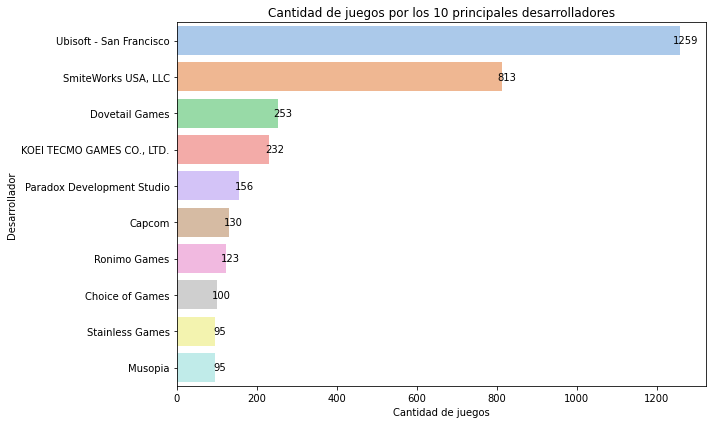

In [10]:
# Obtener los 10 principales desarrolladores por cantidad de juegos
top_desarrolladores = games['developer'].value_counts().head(10)

# Crear el gráfico de barras horizontal utilizando Seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_desarrolladores.values, y=top_desarrolladores.index, palette='pastel')

# Agregar etiquetas de valores en cada barra
for p in ax.patches:
    ax.annotate(format(p.get_width(), '.0f'), 
                (p.get_width(), p.get_y() + p.get_height() / 2.), 
                ha = 'center', va = 'center', 
                xytext = (5, 0), 
                textcoords = 'offset points')

plt.title('Cantidad de juegos por los 10 principales desarrolladores')
plt.xlabel('Cantidad de juegos')
plt.ylabel('Desarrollador')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

**Observacion:** Los desarrolladores que mas se destacan son SmiteWorks USA y Ubisoft - San Francisco, 
  este ultimo siendo el que mas juegos subidos tiene,con una cantidad total de 1259

# EDA sobre el archivo items.parquet

In [11]:
items = pq.read_table("datasets/Parquet/items.parquet").to_pandas()
items.head()

,user_id,item_id,playtime_forever,items_count,item_name
0,76561197970982479,10,0.10,277,Counter-Strike
1,76561197970982479,30,0.12,277,Day of Defeat
2,76561197970982479,300,78.88,277,Day of Defeat: Source
3,76561197970982479,240,30.88,277,Counter-Strike: Source
4,76561197970982479,3830,5.55,277,Psychonauts


*Contenido de datos por columna del dataframe*
* **user_id**:  identificador único del usuario
* **item_id**:  identificador único del juego
* **playtime_forever**:  total del tiempo jugado
* **items_count**:  cantidad total de juegos del usuario
* **item_name**:  nombre del juego


Visualizamos las columnas y sus tipos de datos

In [12]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3285246 entries, 0 to 3285245
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   user_id           object 
 1   item_id           int32  
 2   playtime_forever  float64
 3   items_count       int64  
 4   item_name         object 
dtypes: float64(1), int32(1), int64(1), object(2)
memory usage: 112.8+ MB


Checkeo de nulos por columna

In [13]:
items.isnull().sum()

user_id             0
item_id             0
playtime_forever    0
items_count         0
item_name           0
dtype: int64

Usuarios con mas juegos

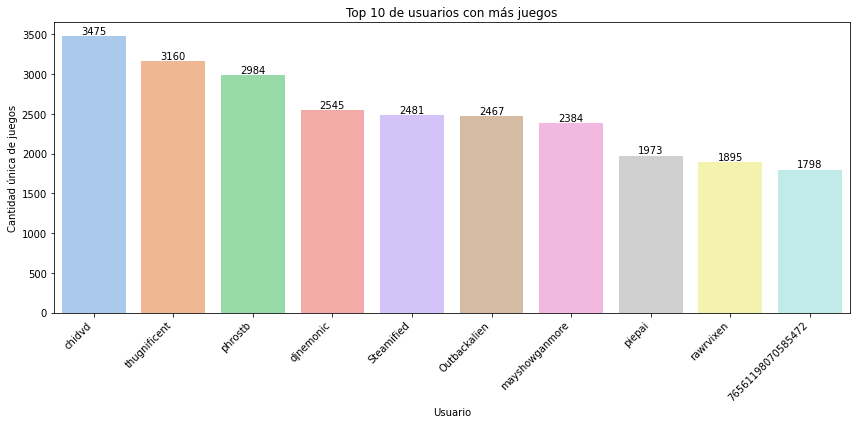

In [14]:
# Agrupar por 'user_id' y sumar la cantidad única de 'item_id'
top_usuarios = items.groupby('user_id')['item_id'].nunique().sort_values(ascending=False).head(10)

# Crear el gráfico de barras utilizando Seaborn
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_usuarios.index, y=top_usuarios.values, palette='pastel')

# Rotar las etiquetas del eje x en diagonal para una mejor legibilidad
plt.xticks(rotation=45, ha='right')

# Agregar etiquetas de valores en cada barra
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')

plt.title('Top 10 de usuarios con más juegos')
plt.xlabel('Usuario')
plt.ylabel('Cantidad única de juegos')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

*Observación:* el usuario con mas juegos en su inventario es **chidvd**

In [15]:
items

,user_id,item_id,playtime_forever,items_count,item_name
0,76561197970982479,10,0.10,277,Counter-Strike
1,76561197970982479,30,0.12,277,Day of Defeat
2,76561197970982479,300,78.88,277,Day of Defeat: Source
3,76561197970982479,240,30.88,277,Counter-Strike: Source
4,76561197970982479,3830,5.55,277,Psychonauts
...,...,...,...,...,...
3285241,76561198329548331,304930,11.28,7,Unturned
3285242,76561198329548331,227940,0.72,7,Heroes & Generals
3285243,76561198329548331,388490,0.05,7,One Way To Die: Steam Edition
3285244,76561198329548331,521570,0.07,7,You Have 10 Seconds 2


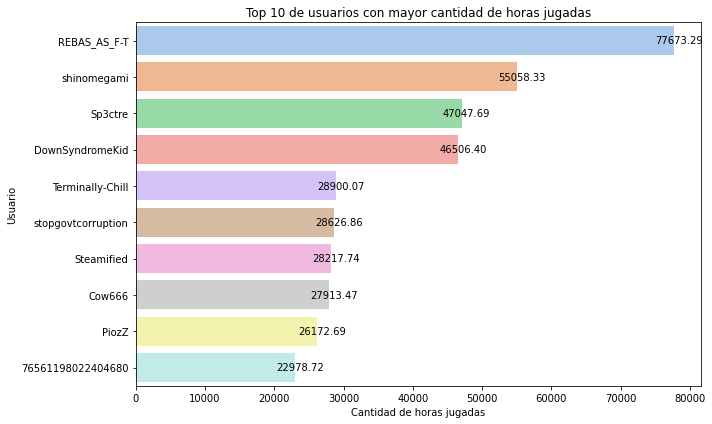

In [16]:
# Agrupar por 'user_id' y calcular la suma de las horas jugadas
horas_por_usuario = items.groupby('user_id')['playtime_forever'].sum().sort_values(ascending=False)

# Tomar los primeros 10 usuarios con la mayor cantidad de horas jugadas
top_usuarios = horas_por_usuario.head(10)

# Crear el gráfico de barras horizontal utilizando Seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(y=top_usuarios.index, x=top_usuarios.values, palette='pastel')

# Agregar etiquetas de valores en cada barra
for p in ax.patches:
    ax.annotate(format(p.get_width(), '.2f'), 
                (p.get_width(), p.get_y() + p.get_height() / 2.), 
                ha='center', va='center', 
                xytext=(5, 0), 
                textcoords='offset points')

plt.title('Top 10 de usuarios con mayor cantidad de horas jugadas')
plt.xlabel('Cantidad de horas jugadas')
plt.ylabel('Usuario')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

*Observación*: el usuario con mayor cantidad de horas jugadas es REBAS_AS_F-T

# EDA sobre el archivo reviews.parquet

In [17]:
reviews = pq.read_table("datasets/Parquet/reviews.parquet").to_pandas()
reviews.head()

,item_id,recommend,user_id,posted_year,sentiment_analysis
0,1250,True,76561197970982479,2011,2
1,22200,True,76561197970982479,2011,2
2,43110,True,76561197970982479,2011,2
3,251610,True,js41637,2014,2
4,227300,True,js41637,2013,2


*Contenido del dataframe por columna*
* **item_id:** identificador único del juego
* **recommend:** calificación del usuario, True positiva y False negativa
* **user_id:** identificador único del usuario
* **posted_year:** año de publicación de la calificación
* **sentiment_analysis:** Analisis de sentimiento

Visualizamos las columnas y sus tipos de datos

In [18]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48498 entries, 0 to 48497
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   item_id             48498 non-null  int32 
 1   recommend           48498 non-null  bool  
 2   user_id             48498 non-null  object
 3   posted_year         48498 non-null  int32 
 4   sentiment_analysis  48498 non-null  int64 
dtypes: bool(1), int32(2), int64(1), object(1)
memory usage: 1.2+ MB


Chequeo de nulos por columna

In [19]:
reviews.isnull().sum()

item_id               0
recommend             0
user_id               0
posted_year           0
sentiment_analysis    0
dtype: int64

Revisamos la cantidad de usuarios unicos que aportaron al menos una recomendación

In [20]:
cantidad = len(reviews["user_id"].unique())
print(f'La cantidad total de usuarios que aportaron reviews fue de {cantidad}')

La cantidad total de usuarios que aportaron reviews fue de 22795


Revisamos el numero de recomendaciones

In [21]:
# Extraemos los dos valores
reviews_positivos = reviews['recommend'].value_counts()[0]
reviews_negativos = reviews['recommend'].value_counts()[1]

# Mostramos los valores
print(f'La cantidad de recomendaciones positivas fue de {reviews_positivos}')
print(f'La cantidad de recomendaciones negativas fue de {reviews_negativos}')

La cantidad de recomendaciones positivas fue de 43557
La cantidad de recomendaciones negativas fue de 4941


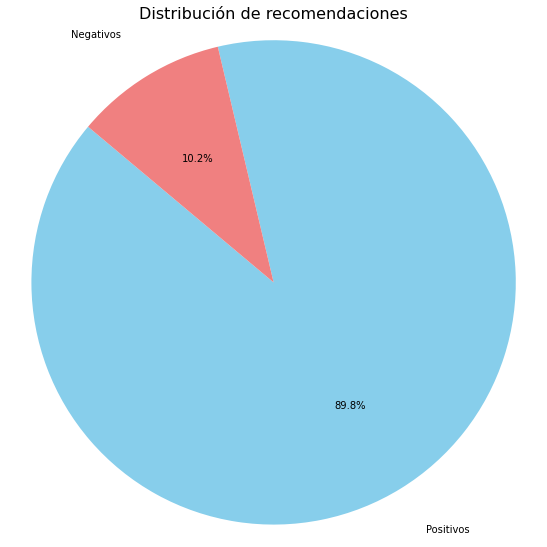

In [22]:
# Datos
labels = ['Positivos', 'Negativos']
sizes = [reviews_positivos, reviews_negativos]

# Crear el gráfico de torta utilizando matplotlib
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'], labeldistance=1.2)
plt.title('Distribución de recomendaciones', fontsize=16)
plt.axis('equal')  # Hacer que el gráfico de pastel sea circular

# Ajustar el tamaño de las letras de los valores y los labels
plt.rcParams.update({'font.size': 20})

# Mostrar el gráfico
plt.tight_layout()
plt.show()

Revisamos los datos del Analisis de Sentimiento

In [23]:
# Asignamos cada dato en una variable
positivo = reviews["sentiment_analysis"].value_counts()[2]
neutral = reviews["sentiment_analysis"].value_counts()[1]
negativo = reviews["sentiment_analysis"].value_counts()[0]

# Mostramos los datos
print(f'La cantidad total de sentimientos positivos fue {positivo}')
print(f'La cantidad total de sentimientos neutrales fue {neutral}')
print(f'La cantidad total de sentimientos negativos fue {negativo}')

La cantidad total de sentimientos positivos fue 30950
La cantidad total de sentimientos neutrales fue 9961
La cantidad total de sentimientos negativos fue 7587


### Ahora buscamos la cantidad de reviews por cada año

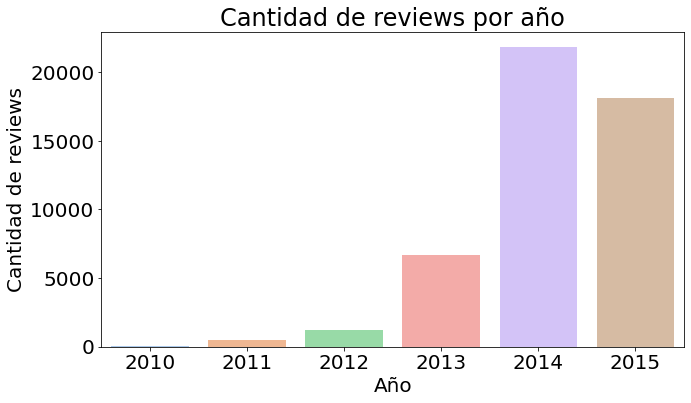

In [24]:

# Contar la cantidad de reviews por año
reviews_por_anio = reviews['posted_year'].value_counts().sort_index()

# Crear el gráfico de barras horizontales utilizando Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=reviews_por_anio.index, y=reviews_por_anio.values, palette='pastel')

plt.title('Cantidad de reviews por año')
plt.xlabel('Año')
plt.ylabel('Cantidad de reviews')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

**Observaciones:** El año 2014 due el año con mas review, con un total de 20000